### REGULARIZATION 
Implementing regularization and understanding the concept of cross validation

In [1]:
#importing python libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat

#### Importing datasets

In [2]:
filename='./datasets/dam_water_flow.mat'
dataset=loadmat(filename)
## dataset is a dictionary and seperating them accordingly
print(dataset.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'Xtest', 'ytest', 'Xval', 'yval'])


In [3]:
X_train=dataset["X"]
Y_train=dataset["y"]
X_CV=dataset["Xval"]
Y_CV=dataset["yval"]
X_test=dataset["Xtest"]
Y_test=dataset["ytest"]
assert(X_train.shape[1]==1)
assert(Y_train.shape[1]==1)


### Visualization of dataset
For better understanding the dataset 


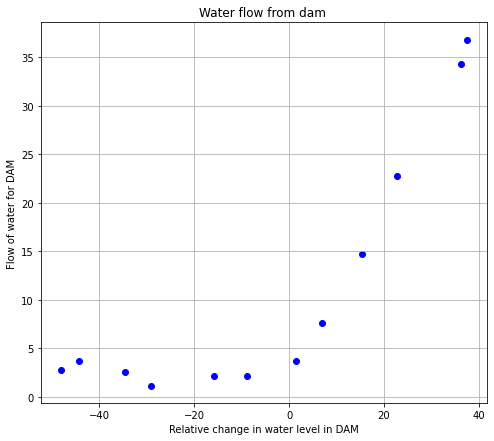

In [4]:
fig,ax=plt.subplots(figsize=(8,7))
ax.scatter(X_train,Y_train,color='b',marker='o')
plt.title("Water flow from dam ")
plt.xlabel('Relative change in water level in DAM')
plt.ylabel('Flow of water for DAM')
plt.grid()

In [5]:
m=X_train.shape[0]
m_cv=X_CV.shape[0]
m_test=X_test.shape[0]
print('Number of training examples:',m)
print('Number of validation examples:',m_cv)
print('Number of test examples:',m_test)
x_o=np.ones([m,1])
X_train=np.hstack((x_o,X_train))
print(X_train)

Number of training examples: 12
Number of validation examples: 21
Number of test examples: 21
[[  1.         -15.93675813]
 [  1.         -29.15297922]
 [  1.          36.18954863]
 [  1.          37.49218733]
 [  1.         -48.05882945]
 [  1.          -8.94145794]
 [  1.          15.30779289]
 [  1.         -34.70626581]
 [  1.           1.38915437]
 [  1.         -44.38375985]
 [  1.           7.01350208]
 [  1.          22.76274892]]


### Building linear regression model

In [6]:
def hypothesis(X,parameters):
    h=np.dot(X,parameters)
    return h

def cost_function(parameters,X,Y,lamda=0):
    m=Y.size
    h=hypothesis(X,parameters)
    #print(np.sum(((h-Y)**2),axis=0,keepdims=True))
    #print(np.sum(parameters[1:].T**2,axis=0,keepdims=True))
    #print(h)
    J=(1/(2*m))*np.sum(((h-Y)**2),axis=0,keepdims=True)+(lamda/m)*np.sum(parameters[1:].T**2,axis=0,keepdims=True)
    return J.flatten()

def gradients(parameters,X,Y,lamda=0):
    m=Y.size
    h=hypothesis(X,parameters)
    #print(np.sum(np.dot((h-Y).T,X),axis=0,keepdims=True))
    #print((lamda/m)*parameters.T)
    grad=(1/(m))*np.sum(np.dot((h-Y).T,X),axis=0,keepdims=True)+(lamda/m)*parameters[1:].T
    return grad.T
initial_weights=np.ones([2,1])
print('The cost function for initial weights :',cost_function(initial_weights,X_train,Y_train,1))
print('The gradients for initial weights :',gradients(initial_weights,X_train,Y_train,1))

The cost function for initial weights : [304.03485889]
The gradients for initial weights : [[-15.21968234]
 [598.25074417]]


In [7]:
def linear_regression(X,Y,lamda=0,learning_rate=0.05,max_iteration=1000):
    parameters=np.zeros((X.shape[1],1))
    cost=cost_function(parameters,X,Y,lamda)
    #print(cost)
    total_cost=[]
    total_cost.append(cost)
    grad=np.zeros((X.shape[1],1))
    tol=1e-2
    for i in range(max_iteration):
        parameters_old=parameters
        grad=gradients(parameters_old,X,Y,lamda)
        parameters-=learning_rate*grad
        J=cost_function(parameters,X,Y,lamda)
        total_cost.append(J[0])
    return parameters


In [8]:
trained_para=linear_regression(X_train,Y_train,0,0.001,10000)
print(trained_para)
print('cost function using gradient descent method:',cost_function(trained_para, X_train, Y_train, 0))

[[13.0871011 ]
 [ 0.36777442]]
cost function using gradient descent method: [22.37390681]


In [9]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression(fit_intercept=False)
regr.fit(X_train, Y_train.ravel())
model_parameters=regr.coef_
print(np.array([model_parameters]).T)
print(cost_function(np.array([model_parameters]).T, X_train, Y_train, 0))

[[13.08790351]
 [ 0.36777923]]
[22.3739065]


Text(0.5, 1.0, 'Comparition of models')

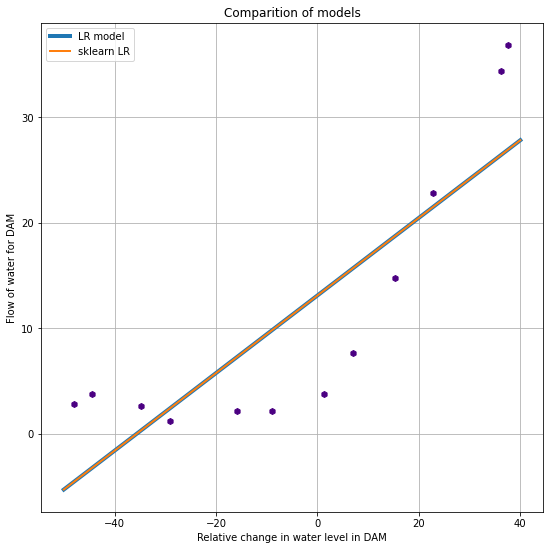

In [10]:
X_inputs=np.linspace(-50,40)
Y=trained_para[0]+trained_para[1]*X_inputs
Y_model=model_parameters[0]+model_parameters[1]*X_inputs
fig,ax =plt.subplots(figsize=(9,9))
ax.scatter(dataset["X"],Y_train,marker='h',color='#4b0082')
ax.plot(X_inputs,Y,label='LR model',linewidth=4)
ax.plot(X_inputs,Y_model,label='sklearn LR',linewidth=2)
plt.title("Water flow from dam ")
plt.xlabel('Relative change in water level in DAM')
plt.ylabel('Flow of water for DAM')
plt.grid()
plt.legend()
plt.title('Comparition of models')

##### performing cross validation and building learning curve for better understanding of the parameters which have to be optimized for a better fit

In [11]:
def learning_curve(X,Y,X_CV,Y_CV,lamda=0):
    m=X.shape[0]
    train_loss=[]
    validation_loss=[]
    for i in range(1,m):
        parameters=linear_regression(X[:i],Y[:i],lamda,0.001,10000)
        J_t=cost_function(parameters,X[:i],Y[:i],lamda)
        J_CV=cost_function(parameters,X_CV,Y_CV,lamda)
        train_loss.append(J_t)
        validation_loss.append(J_CV)
    return train_loss,validation_loss

In [12]:
x_o=np.ones([m_cv,1])
X_C=np.hstack((x_o,X_CV))
t_l,v_l=learning_curve(X_train,Y_train,X_C,Y_CV)

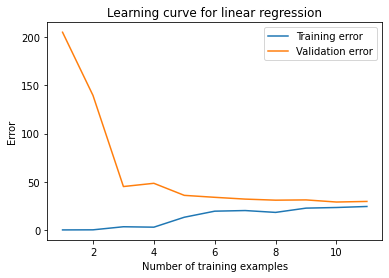

In [13]:
plt.plot(np.arange(1,12), t_l, label='Training error')
plt.plot(np.arange(1,12), v_l, label='Validation error')
plt.title('Learning curve for linear regression')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend();

### Analysis of the learning curve
From the learning curve, the bias is less which means the model is underfitting. We will check the model's accuarcy with test data.

In [14]:
x_o=np.ones([m_test,1])
X_t=np.hstack((x_o,X_test))
  
print('Cost function for test data :',cost_function(trained_para,X_t,Y_test,lamda=0))
print(np.array([X_train[:,1]]).T)

Cost function for test data : [32.50745516]
[[-15.93675813]
 [-29.15297922]
 [ 36.18954863]
 [ 37.49218733]
 [-48.05882945]
 [ -8.94145794]
 [ 15.30779289]
 [-34.70626581]
 [  1.38915437]
 [-44.38375985]
 [  7.01350208]
 [ 22.76274892]]


In [15]:
def poly(X_input,degree):
    n=X_input.shape[0]
    m=X_input.shape[1]
    #print(n,m)
    X_input,mu,sigma=normalization(X_input)
    X=np.zeros((n*degree+1,m))
    j=0
    o=0
    for i in range(0,n*degree+1): 
        X[i,:]=X_input[j,:]**o
        if o<degree:
            o+=1
        else:
            j+=1
            o=1   
    return X.T,mu,sigma

def normalization(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0, ddof=1)
    X_norm = (X - mu) / sigma
    return X_norm,mu,sigma

C:\Users\VISWAMBHAR YASA\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.35663e-26): result may not be accurate.
  overwrite_a=True).T


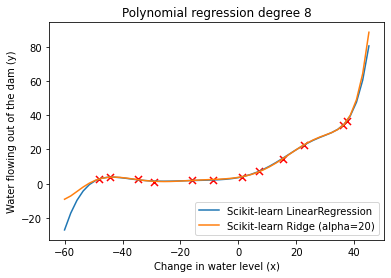

In [16]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=8)
X_train_poly = poly.fit_transform(X_train[:,1].reshape(-1,1))

regr2 = LinearRegression()
regr2.fit(X_train_poly, Y_train)

regr3 = Ridge(alpha=20)
regr3.fit(X_train_poly, Y_train)

# plot range for x
plot_x = np.linspace(-60,45)
# using coefficients to calculate y
plot_y = regr2.intercept_+ np.sum(regr2.coef_*poly.fit_transform(plot_x.reshape(-1,1)), axis=1)
plot_y2 = regr3.intercept_ + np.sum(regr3.coef_*poly.fit_transform(plot_x.reshape(-1,1)), axis=1)

plt.plot(plot_x, plot_y, label='Scikit-learn LinearRegression')
plt.plot(plot_x, plot_y2, label='Scikit-learn Ridge (alpha={})'.format(regr3.alpha))
plt.scatter(X_train[:,1], Y_train, s=50, c='r', marker='x', linewidths=1)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.title('Polynomial regression degree 8')
plt.legend(loc=4);